# Tic-Tac-Toe Endgame Classification
<hr>

In this example, we would take up the binary classification task on possible configurations of tic-tac-toe game.

Dataset : https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

#### Data Set Information:

This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row"). 

Interestingly, this raw database gives a stripped-down decision tree algorithm (e.g., ID3) fits. However, the rule-based CN2 algorithm, the simple IB1 instance-based learning algorithm, and the CITRE feature-constructing decision tree algorithm perform well on it.


#### Attribute Information:

1. top-left-square: {x,o,b} 
2. top-middle-square: {x,o,b} 
3. top-right-square: {x,o,b} 
4. middle-left-square: {x,o,b} 
5. middle-middle-square: {x,o,b} 
6. middle-right-square: {x,o,b} 
7. bottom-left-square: {x,o,b} 
8. bottom-middle-square: {x,o,b} 
9. bottom-right-square: {x,o,b} 
10. Class: {positive,negative}



In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [12]:
# read .csv from provided dataset
csv_filename="tic-tac-toe.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["TopLeft", "TopMiddle" , "TopRight" ,
                     "MiddleLeft", "MiddleMiddle" , "MiddleRight" ,
                     "BottomLeft", "BottomMiddle" , "BottomRight" , "Class" ])

In [13]:
df.head()

,TopLeft,TopMiddle,TopRight,MiddleLeft,MiddleMiddle,MiddleRight,BottomLeft,BottomMiddle,BottomRight,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [14]:
df['Class'].unique()

array(['positive', 'negative'], dtype=object)

In [8]:
#Convert animal labels to numbers
le = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,TopLeft,TopMiddle,TopRight,MiddleLeft,MiddleMiddle,MiddleRight,BottomLeft,BottomMiddle,BottomRight,Class
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [15]:
for col in df.columns:
    df[col] = pd.get_dummies(df[col])

In [16]:
df.head()

,TopLeft,TopMiddle,TopRight,MiddleLeft,MiddleMiddle,MiddleRight,BottomLeft,BottomMiddle,BottomRight,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
features=(list(df.columns[:-1]))

In [20]:
features

['TopLeft',
 'TopMiddle',
 'TopRight',
 'MiddleLeft',
 'MiddleMiddle',
 'MiddleRight',
 'BottomLeft',
 'BottomMiddle',
 'BottomRight']

In [21]:
X = df[features]
y = df['Class']

In [22]:
X.head()

,TopLeft,TopMiddle,TopRight,MiddleLeft,MiddleMiddle,MiddleRight,BottomLeft,BottomMiddle,BottomRight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [24]:
print X_train.shape, y_train.shape

(574, 9) (574L,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 1 - TopMiddle (0.127575) 
2. feature 5 - MiddleRight (0.125550) 
3. feature 0 - TopLeft (0.117647) 
4. feature 6 - BottomLeft (0.115633) 
5. feature 3 - MiddleLeft (0.113785) 
6. feature 8 - BottomRight (0.112243) 
7. feature 2 - TopRight (0.107885) 
8. feature 7 - BottomMiddle (0.107579) 
9. feature 4 - MiddleMiddle (0.072104) 


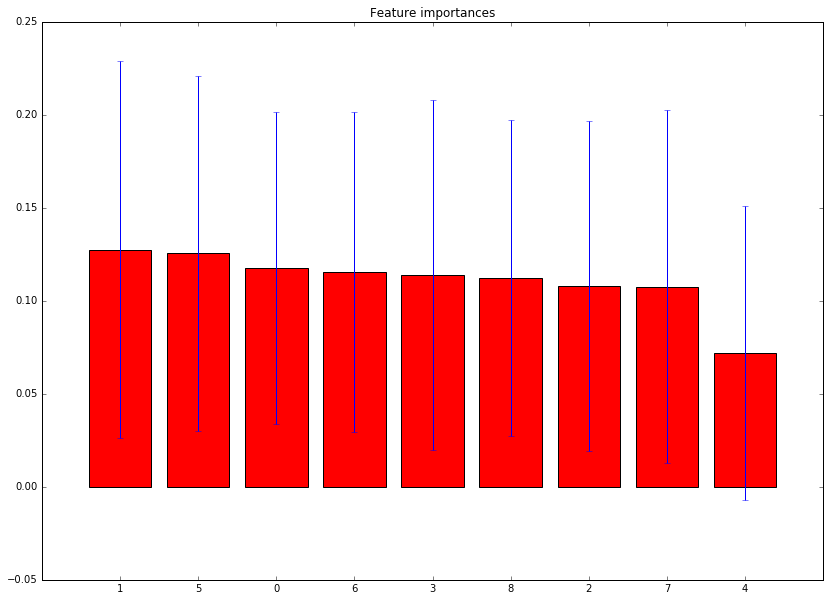

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [26]:
importances[indices[:5]]

array([ 0.12757459,  0.12554975,  0.11764683,  0.11563324,  0.11378505])

In [27]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 1 - TopMiddle (0.127575)
2. feature 5 - MiddleRight (0.125550)
3. feature 0 - TopLeft (0.117647)
4. feature 6 - BottomLeft (0.115633)
5. feature 3 - MiddleLeft (0.113785)


In [28]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

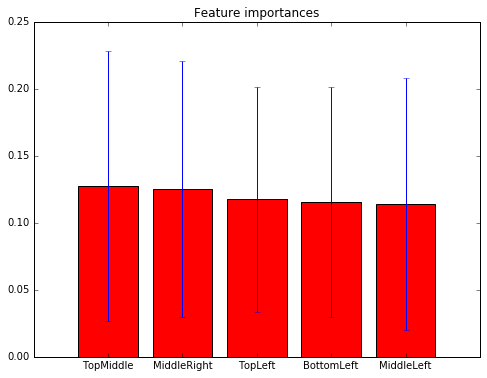

In [29]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [30]:
t0=time()
print "DecisionTree"

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print "Acurracy: ", clf_dt.score(X_test,y_test)
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
Acurracy:  0.690104166667
time elapsed:  0.0


## cross validation for DT

In [31]:
tt0=time()
print "cross result========"
scores = cross_validation.cross_val_score(dt, X, y, cv=3)
print scores
print scores.mean()
tt1=time()
print "time elapsed: ", tt1-tt0
print "\n"

cross result========
[ 0.603125    0.646875    0.36792453]
0.539308176101
time elapsed:  0.0350000858307




### Tuning our hyperparameters using GridSearch

In [44]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)


print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.714
Best parameters set:
	clf__max_depth: 25
	clf__min_samples_leaf: 1
	clf__min_samples_split: 1
             precision    recall  f1-score   support

        0.0       0.87      0.87      0.87       253
        1.0       0.76      0.76      0.76       131

avg / total       0.83      0.83      0.83       384



In [47]:
t0=time()
print "DecisionTree"

dt1 = DecisionTreeClassifier(min_samples_split=1,max_depth=25,min_samples_leaf=1, random_state=99)

clf_dt1=dt1.fit(X_train,y_train)

print "Acurracy: ", clf_dt1.score(X_test,y_test)
t1=time()
print "time elapsed: ", t1-t0

export_graphviz(clf_dt1, 
                out_file='tree.dot', 
                feature_names=features)

DecisionTree
Acurracy:  0.833333333333
time elapsed:  0.00399994850159


After we have installed GraphViz on our computer, we can convert the tree.dot file into a PNG file by executing the following command from the command line in the location where we saved the tree.dot file:

> dot -Tpng tree.dot -o tree.png

# Random Forest accuracy and time elapsed caculation

In [33]:
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print "Acurracy: ", clf_rf.score(X_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.822916666667
time elapsed:  1.14800000191


## cross validation for RF

In [34]:
tt2=time()
print "cross result========"
scores = cross_validation.cross_val_score(rf, X, y, cv=3)
print scores
print scores.mean()
tt3=time()
print "time elapsed: ", tt3-tt2
print "\n"


cross result========
[ 0.890625    0.890625    0.27987421]
0.687041404612
time elapsed:  3.69499993324




### Tuning Models using GridSearch

In [48]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   36.3s finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.810
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 1
	clf__min_samples_split: 1
	clf__n_estimators: 50
Accuracy: 0.825520833333
             precision    recall  f1-score   support

        0.0       0.87      0.86      0.87       253
        1.0       0.74      0.76      0.75       131

avg / total       0.83      0.83      0.83       384



# Naive Bayes accuracy and time elapsed caculation


In [35]:
t4=time()
print "NaiveBayes"
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print "Acurracy: ", clf_nb.score(X_test,y_test)
t5=time()
print "time elapsed: ", t5-t4

NaiveBayes
Acurracy:  0.658854166667
time elapsed:  0.048999786377


## cross-validation for NB

In [36]:
tt4=time()
print "cross result========"
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print scores
print scores.mean()
tt5=time()
print "time elapsed: ", tt5-tt4
print "\n"

cross result========
[ 0.5125      0.6125      0.47169811]
0.532232704403
time elapsed:  0.0410001277924




# KNN accuracy and time elapsed caculation

In [37]:
t6=time()
print "KNN"
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print "Acurracy: ", clf_knn.score(X_test,y_test) 
t7=time()
print "time elapsed: ", t7-t6

KNN
Acurracy:  0.736979166667
time elapsed:  0.0230000019073


## cross validation for KNN

In [38]:
tt6=time()
print "cross result========"
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print scores
print scores.mean()
tt7=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.85492228  0.81770833  0.78534031  0.7382199   0.30890052]
0.701018269222
time elapsed:  0.0859999656677




### Fine tuning the model using GridSearch

In [92]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,10]}

grid = grid_search.GridSearchCV(knn, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best score: 0.517
Best parameters set:
	n_neighbors: 1
             precision    recall  f1-score   support

          1       0.64      0.56      0.60        16
          2       0.40      0.29      0.33         7
          3       1.00      0.25      0.40         4
          4       0.25      0.12      0.17         8
          5       0.20      1.00      0.33         1
          6       0.00      0.00      0.00         3
          7       0.09      0.50      0.15         2

avg / total       0.47      0.37      0.38        41



[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.9s finished


# SVM accuracy and time elapsed caculation

In [39]:
t7=time()
print "SVM"

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print "Acurracy: ", clf_svc.score(X_test,y_test) 
t8=time()
print "time elapsed: ", t8-t7

SVM
Acurracy:  0.658854166667
time elapsed:  0.0620000362396


## cross validation for SVM

In [41]:
tt7=time()
print "cross result========"
scores = cross_validation.cross_val_score(svc,X,y, cv=5)
print scores
print scores.mean()
tt8=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.65284974  0.65104167  0.65445026  0.65445026  0.65445026]
0.653448438588
time elapsed:  14.5099999905




In [42]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.650

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.6s finished
C:\Miniconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Best parameters set:
	C: 1
	kernel: 'linear'
             precision    recall  f1-score   support

        0.0       0.66      1.00      0.79       253
        1.0       0.00      0.00      0.00       131

avg / total       0.43      0.66      0.52       384



In [43]:
pipeline = Pipeline([
    ('clf', SVC(kernel='linear', gamma=0.01, C=10))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   18.7s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.650
Best parameters set:
	clf__C: 0.1
	clf__gamma: 0.01
             precision    recall  f1-score   support

        0.0       0.66      1.00      0.79       253
        1.0       0.00      0.00      0.00       131

avg / total       0.43      0.66      0.52       384



---